# Limpieza de datos
#### Grupo 7_2

* Vamos a aplicar el [checklist del Banco Mundial](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) en Python usando el [SciPy stack](https://www.scipy.org/stackspec.html), principalmente pandas

## 0. Prerequisitos

In [1]:
# Para que la notebook corra tanto en jupyter como en colab.
# NO ES RECOMENDADO realizar pip install desde un notebook.

import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

El sistema no puede encontrar el archivo especificado.


# 1. Importando los datos

# 1.1. Verificar que no hay problemas en la importación

In [2]:
import pandas as pd

# para que los numeros flotantes me los muestre solo con dos decimales
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Importamos datos de proyectos de Kickstarter la plataforma de Crowdsourcing

kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv")

In [4]:
kickstarter_2018[:5]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


In [5]:
# Set seed for reproducibility

# Al fijar la semilla no habrá azar.
# Esto es algo necesario cuando queremos "reproducir valores aleatorios".

import numpy as np
np.random.seed(0)

In [6]:
kickstarter_2018.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
338862,796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.00,2010-12-08 08:44:04,0.00,failed,0,US,0.00,0.00,10526.00
277871,483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.00,2016-01-28 04:56:18,51.00,failed,5,US,51.00,51.00,10000.00
47000,123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.00,2014-11-07 02:24:36,25.00,failed,1,US,25.00,25.00,60000.00
111338,1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.00,2012-03-15 01:16:10,585.00,successful,17,US,585.00,585.00,500.00
53743,1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.00,2016-05-27 00:07:25,25.00,failed,1,US,25.00,25.00,25000.00


* Veamos si la descripción del dataset se corresponde con lo levantado    https://www.kaggle.com/kemical/kickstarter-projects/data

In [7]:
pd.DataFrame([["ID", "No description provided", "Numeric"],
["name", "No description provided", "String"],
["category", "No description provided", "String"],
["main_category", "No description provided", "String"],
["currency", "No description provided", "String"],
["deadline", "No description provided", "DateTime"],
["goal", "Goal amount in project currency", "Numeric"],
["launched", "No description provided", "DateTime"],
["pledged", "Pledged amount in the project currency", "Numeric"],
["state", "No description provided", "String"],
["backers", "No description provided", "Numeric"],
["country", "No description provided", "String"],
["usd pledged", "Pledged amount in USD (conversion made by KS)", "Numeric"],
["usd_pledged_real", "Pledged amount in USD (conversion made by fixer.io api)", "Numeric"],
["usd_goal_real", "Goal amount in USD", "Numeric"]], columns=["Field name","Field description", "Type"])

,Field name,Field description,Type
0,ID,No description provided,Numeric
1,name,No description provided,String
2,category,No description provided,String
3,main_category,No description provided,String
4,currency,No description provided,String
5,deadline,No description provided,DateTime
6,goal,Goal amount in project currency,Numeric
7,launched,No description provided,DateTime
8,pledged,Pledged amount in the project currency,Numeric
9,state,No description provided,String


* Ahora veamos los tipos de datos que detectó pandas

In [8]:
kickstarter_2018.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

* Los campos object generalmente son String
* Vemos que no reconoció como fechas a las variables: **deadline** y **launched** 

In [9]:
# Vemos un resumen de los datos

kickstarter_2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378661.00,378661.00,378661.00,374864.00,378661.00,378661.00
mean,1074731191.99,49080.79,9682.98,105.62,7036.73,9058.92,45454.40
std,619086204.32,1183391.26,95636.01,907.19,78639.75,90973.34,1152950.06
min,5971.00,0.01,0.00,0.00,0.00,0.00,0.01
25%,538263516.00,2000.00,30.00,2.00,16.98,31.00,2000.00
50%,1075275634.00,5200.00,620.00,12.00,394.72,624.33,5500.00
75%,1610148624.00,16000.00,4076.00,56.00,3034.09,4050.00,15500.00
max,2147476221.00,100000000.00,20338986.27,219382.00,20338986.27,20338986.27,166361390.71


In [10]:
# Por defecto se ven los datos numéricos
# Pediremos ver el resto de los datos

kickstarter_2018.describe(include=['object'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


In [11]:
# Operamos sobre los datos pidiendo el valor mínimo

kickstarter_2018['launched'].min()

'1970-01-01 01:00:00'

In [12]:
# Operamos sobre los datos pidiendo el valor máximo
kickstarter_2018['launched'].max()

'2018-01-02 15:02:31'

In [13]:
# Indicamos que columnas corresponden a fechas

kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"])
kickstarter_2018.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [14]:
# Ahora podemos calcular el rango de la fecha de lanzamiento -> 'launched'

kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min()

Timedelta('17533 days 14:02:31')

# 1.2. Asegurar de tener ids/claves únicas

* Chequeo de datos duplicados

In [15]:
kickstarter_2018.shape

(378661, 15)

* Pandas soporta índices (id) en los DataFrames

In [16]:
# Recargamos el conjunto de datos indicando que columna será el índice (index_col=['ID'])

kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [17]:
kickstarter_2018[:5]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


In [18]:
kickstarter_2018.shape

(378661, 14)

* Indicar el índice nos permite que podamos usarlo para buscar por ese dato

In [19]:
kickstarter_2018.loc[999988282]

name                Nou Renmen Ayiti!  We Love Haiti!
category                              Performance Art
main_category                                     Art
currency                                          USD
deadline                          2011-08-16 00:00:00
goal                                          2000.00
launched                          2011-07-19 09:07:47
pledged                                        524.00
state                                          failed
backers                                            17
country                                            US
usd pledged                                    524.00
usd_pledged_real                               524.00
usd_goal_real                                 2000.00
Name: 999988282, dtype: object

* Buscar por índice, nos permite verificar si hay filas de contenidos duplicado

In [20]:
# Para buscar duplicados

kickstarter_2018[kickstarter_2018.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


* No detectó duplicados
* Como Pandas acepta valores duplicados en los índices también debemos verificarlos

In [21]:
# Estadísticos descriptivos de la columna ID

pd.Series(kickstarter_2018.index,dtype=str).describe()

count       378661.00
mean    1074731191.99
std      619086204.32
min           5971.00
25%      538263516.00
50%     1075275634.00
75%     1610148624.00
max     2147476221.00
Name: ID, dtype: float64

In [22]:
# Buscamos nuevamente si hay datos duplicados

kickstarter_2018[kickstarter_2018.index.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


* No detectó duplicados buscando por ID

## Repasamos con un ejemplo

In [23]:
csv='1,2\n3,3\n1,3'
print(csv)

1,2
3,3
1,3


In [24]:
# pasamos los datos a una tabla
from io import StringIO
df = pd.read_csv(StringIO(csv), names=['id','value'], index_col='id')
df

,value
id,
1,2
3,3
1,3


In [25]:
# Buscamos duplicados, solo muestra el primer duplicado
df[df.duplicated()]

,value
id,
1,3


In [26]:
# si quremos ver todos los valores repetidos hay que usar keep=False
df[df.index.duplicated(keep=False)]

,value
id,
1,2
1,3


### Ejercicio 1:

* Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [27]:
# Recargamos la base de datos indicando que la columna índice será el Nombre -> (index_col=['name'])

kickstarter_2018_name = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['name'])
kickstarter_2018_name[:4]

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
name,,,,,,,,,,,,,,
The Songs of Adelaide & Abullah,1000002330,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
Greeting From Earth: ZGAC Arts Capsule For ET,1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
Where is Hank?,1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
ToshiCapital Rekordz Needs Help to Complete Album,1000007540,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00


In [28]:
# Creamos un nuevo dataset que tenga los registros con nombres duplicados
# Buscamos nuevamente si hay datos duplicados

kickstarter_2018_dup = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values('name')
kickstarter_2018_dup[:4]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00


In [29]:
kickstarter_2018_dup.shape

(5125, 14)

* Tenemos **5125** registros con nombres duplicados

# 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

Hay muchas técnicas para despersonalizar datos.

Para ilustrar mostramos las ofrecidas por Google https://cloud.google.com/dlp/docs/transformations-reference:

* **Reemplazo**: Reemplaza cada valor de entrada con un valor determinado.
* **Ocultamiento**: Quita un valor y lo oculta.
* **Enmascaramiento con caracteres**: Enmascara una string por completo o parcialmente mediante el reemplazo de un número determinado de caracteres con un carácter fijo especificado..
* **Seudonimización mediante el reemplazo de un valor de entrada con un hash criptográfico**: Reemplaza valores de entrada con una string hexadecimal de 32 bytes mediante una clave de encriptación de datos.
* **Cambio de fechas**: Cambia las fechas por un número de días al azar, con la opción de ser coherente en el mismo contexto..
* **Seudonimización mediante el reemplazo con token de preservación de formato criptográfico**: Reemplaza un valor de entrada con un token, o valor sustituto, de la misma longitud mediante la encriptación de preservación de formato (FPE) con el modo de operación FFX. Esto permite que se use el resultado en sistemas con validación de formato o que necesitan aparecer como reales a pesar de que la información no se revela.
* **Valores de depósito con base en rangos de tamaño fijos**: Enmascara los valores de entrada y los reemplaza por depósitos, o rangos dentro de los cuales se encuentra el valor de entrada.
* **Valores de depósito con base en rangos de tamaño personalizados**: Valores de entrada de depósito con base en rangos configurables por el usuario y valores de reemplazo.
* **Extracción de datos de tiempo**: EExtrae o preserva una porción de los valores Date, Timestamp y TimeOfDay.

In [30]:
# Librería para hacer hashs -> códigos para encriptar nombres y despersonalizar los datos
from hashlib import md5

In [31]:
# Es necesario setear el encoding utf-8 andes de hashear

# Los floats no tienen atributo 'encode' por eso los debemos pasar a str

def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


kickstarter_2018['name'].apply(hashit)

ID
1000002330    a6828ae8a2eca25f0dd7035efc0af0a0
1000003930    81609b3bdc0b96f429672d69702f2524
1000004038    c12f5c3bace2f0213cdb2679a265dca0
1000007540    4dbdcf09c86bbf5683ec39bc57b77f81
1000011046    9c01404a2ef702811c2088ce139042ad
1000014025    3a26b565c8396d4867dda27816836e04
1000023410    1602dce9289c950176c41ce124944335
1000030581    1abb0a27e1a3ce5a79965e3022c6bddc
1000034518    3b3a87aebec0d9c1b3a4a5e4da7a88a8
100004195     d7c53ef574a108d857d52087bb685244
100004721     eba20b66506f511bfacfe843176f5e15
100005484     9df25d0c0e2f8ea9de303f3d4efaf3c8
1000055792    717f62eae71408f00fa49227da83feae
1000056157    6532f0fa53550fd516921a2d7a1121d6
1000057089    799a510f874b6d47c1fde736d22cae3e
1000064368    93ebbffc751f9cc8d31e0147b7b1c7e3
1000064918    c10592831d537538905aefc12d54b49d
1000068480    0f109f9875645b801843775bbeadb1f1
1000070642    2d3d4b4267af87948bf7ac6d3ca13b54
1000071625    26c10e7de5df6269e71df1bf49ff4da9
1000072011    459cec5845add6a7f8fb1498cfc0e618
1000081649

### Ejercicio 2:

* Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [32]:
kickstarter_2018_dup.shape

(5125, 14)

In [33]:
# Verificamos si estos registros también tienen el hash de nombre duplicado

kickstarter_2018_dup['name_hash'] = kickstarter_2018_dup['name'].apply(hashit)
kickstarter_2018_dup[:4]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_hash
ID,,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00,0c7a251ffe4c7834cbc4b04906952ff1
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00,0c7a251ffe4c7834cbc4b04906952ff1
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00,67554ab4203d95f2f2f05365f768206e
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00,67554ab4203d95f2f2f05365f768206e


In [34]:
kickstarter_2018_dup.shape

(5125, 15)

* Tenemos **5125** registros con hash duplicados
* Estos registros se corresponden con los que habíamos detectado para nombres duplicados

# 1.4. Nunca modificar los datos crudos u originales


In [35]:
#no hacer modificaciones para no perder los datos originales

#if not in_colab:
#  kickstarter_2018.to_csv(BASE_DIR + "/output/ks-projects-201801-for-pandas.csv")


# 2. Pasos necesarios


In [36]:
# Paso necesario si no estamos en colab

import pandas as pd

if not in_colab:
  kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801-for-pandas.csv",
  #kickstarter_2018 = pd.read_csv(BASE_DIR + "/output/ks-projects-201801-for-pandas.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'])

In [37]:
kickstarter_2018.describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378657,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00
unique,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40
std,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06
min,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00


## 2.1. En las etiquetas de las variables, no se deben usar caracteres especiales.

In [38]:
# helpful character encoding module
import chardet

In [39]:
# Los caracteres 'normales' son los números y las letras
import string

string.ascii_letters + string.digits 

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

* ASCII: Es una de las primeras codificaciones (o encoding) disponibles. Ver https://en.wikipedia.org/wiki/ASCII

* Un encoding es un mapa de caracteres a una representación en bits (por ejemplo 1000001). ASCII es uno de los primeros estandares para interoperatividad entre computadoras (antes cada fabricante de computadora usa su propia codificación), contempla sólo los caracteres ingleses y usa 7 bits, por ejemplo *1000001* codifica el caracter *A*

* Cómo sólo representaban los caracteres ingleses, empiezan a aparecer variantes para distintos idiomas, Microsoft hizo los propios para internacionalizar Windows, hubo otro estandar ISO 8859, hasta que llegó el éstandar Unicode que hizo múltiples encodings pero cada uno contempla múltiples idiomas e incluso es extensible a futuro. UTF-8 es de esos encodings el más utilizado. Ver https://en.wikipedia.org/wiki/Unicode

* En particular, Python 3 utiliza UTF-8 por defecto (lo que no sucedía en Python 2).

### Veamos un ejemplo práctico

In [40]:
# Comenzar por un string
before = "This is the euro symbol: €"

# checkear que datatype es
type(before)

str

In [41]:
# cambiar el encode reemplazando caracteres que den errores
after = before.encode("utf-8", errors = "replace")

# checkear que datatype es
type(after)

bytes

In [42]:
# veamos como se ven los bytes
after

# cuando no tiene un simbolo ascii python muestra el codigo exadecimal del símbolo (\xe2\x82\xac)

b'This is the euro symbol: \xe2\x82\xac'

In [43]:
# reconvertirlo a utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [44]:
# decodifica los bytes con el ascii encoding

#print(after.decode("ascii"))
after_ascii = after.decode("ascii", errors = "replace")

In [45]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# convert it back to utf-8
print(after.decode("utf-8"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: €


* Cuando obtenemos un error `UnicodeDecodeError` nos indica que el archivo no estaría en Unicode. 
* Si no está en algún metadato o no fue indicado es dificil detectar el encoding, para ello utilizamos un paquete de Python, que aplica unas heurísticas para detectar encoding.

In [46]:
# Módulo para detectar el encoding

import chardet

if in_colab:
  !wget -c $BASE_DIR/input/kickstarter-projects/ks-projects-201612.csv
  DOWN_DIR = "./"
else:
  DOWN_DIR = BASE_DIR + "/input/kickstarter-projects/"
  
with open(DOWN_DIR + "/ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

* El encoding que posee la base de datos es: **Windows-1252**
* Entonces, una vez detectado, le podemos indicar el encoding al leer el archivos

In [47]:
# Leemos la base de datos con el encoding detectado por el módulo chardet

kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv", 
                               encoding='Windows-1252')
kickstarter_2016.head()

C:\Users\W10\miniconda3\envs\diplodatos-ayvd\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,nan
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,nan
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,nan
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,nan
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,nan


* Otro problema con los caracteres que es más sutíl es el: **[Mojibake](https://en.wikipedia.org/wiki/Mojibake)**

* Sucede al leer UTF-8 como ASCII extendido (ie. `Windows-*`, `iso-8859-*` entre otros)

### Ejemplo de mojibake:

In [48]:
"cigüeña".encode('utf-8').decode('iso-8859-1')

'cigÃ¼eÃ±a'

* Para solucionar esto vamos a usar un módulo específico: [ftfy](https://ftfy.readthedocs.io/en/latest/). 

* Este módulo nos permite ordenar cadenas por rareza

In [49]:
import ftfy.badness as bad

In [50]:
# Buscamos valores raros en la variable 'name' de la base de datos

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1221990593,Support PMCD´s ¨From a Different Clay¨,Dance,Dance,USD,2011-06-08,1500.00,2011-04-28 05:15:32,1940.00,successful,27,US,1940.00,1940.00,1500.00,3
1234089244,Cracking (Mastering) the Metaphor (Political)...,Nonfiction,Publishing,USD,2013-10-27,30000.00,2013-09-27 23:33:29,0.00,failed,0,US,0.00,0.00,30000.00,2
124795481,µGALE (Canceled),Wearables,Technology,EUR,2015-04-17,18000.00,2015-02-16 01:55:34,10.00,canceled,2,NL,11.39,10.81,19465.14,2
1468489999,µCurrent GOLD - Precision Multimeter Current A...,Hardware,Technology,AUD,2013-12-31,9900.00,2013-12-17 10:28:09,116575.17,successful,1268,AU,104343.69,104871.51,8906.08,2
1610503461,µPeek - The Professional Microscope that Fits ...,Technology,Technology,CHF,2016-01-09,125000.00,2015-12-10 10:08:18,247688.14,successful,1435,CH,249249.19,246848.85,124576.44,2
16174550,PARALELO 19 Nº,Photography,Photography,MXN,2017-04-15,15000.00,2017-03-01 00:00:24,3340.00,failed,8,MX,0.00,177.36,796.52,2
1719215256,Kickstarter Gold: Manual Coffeemaker Nº3,Product Design,Design,USD,2017-07-22,60000.00,2017-06-20 15:29:56,68587.33,successful,618,US,21002.00,68587.33,60000.00,2
1837094178,¨Midgard's taigh-seinnse/ Eröffnung Mittelalte...,Restaurants,Food,CHF,2016-09-29,50000.00,2016-08-30 09:36:42,150.00,failed,1,CH,0.00,153.93,51310.47,2
2056123754,ZEIº - the most simple time tracking solution,Technology,Technology,EUR,2016-10-26,75000.00,2016-09-20 15:54:49,313637.00,successful,3140,AT,9451.58,342555.54,81915.29,2


* Tenemos **26 valores raros** en la variable 'name' de la base de datos

In [51]:
# Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de las variables/columnas

kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index(['usd pledged'], dtype='object')

* Tenemos una columna en cuyo nombre hay un espacio vacío(usd pledged), 
* Este espacio en el nombre de la variable, no nos causará inconvenientes. por eso asignaremos un guión bajo "_"  donde hay un espacio vacío (usd_pledged).

In [52]:
# Reemplazamos el espacio vacío por un guión bajo

kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


In [53]:
kickstarter_2018.usd_pledged.head()

ID
1000002330      0.00
1000003930    100.00
1000004038    220.00
1000007540      1.00
1000011046   1283.00
Name: usd_pledged, dtype: float64

### Ejercicio 3

* Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [54]:
# Importamos la base de datos con encoding iso-8859-1

# kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv")

kickstarter_2018_iso_8859_1 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                                          encoding='iso-8859-1')

kickstarter_2018_iso_8859_1.columns[~kickstarter_2018_iso_8859_1.columns.str.match(r'^(\w+)$')]

Index(['usd pledged'], dtype='object')

In [55]:
# Buscamos valores raros en la columna 'name' de la base de datos con encoding iso-8859-1

def weird(val):
    if isinstance(val, float):
        return 0
    return bad.sequence_weirdness(val)

kickstarter_2018_iso_8859_1['name_weirdness'] = kickstarter_2018_iso_8859_1['name'].apply(weird)
kickstarter_2018_iso_8859_1[kickstarter_2018_iso_8859_1['name_weirdness'] > 1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
63,1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.00,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00,2
70,1000260691,Gizbeeâ¢ Unlimited Removable Storage for Your...,Gadgets,Technology,USD,2016-03-25,87000.00,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,2
123,1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,2015-12-29,2000.00,2015-11-21 14:12:27,14794.00,successful,624,US,14794.00,14794.00,2000.00,6
157,1000644119,OperaciÃ³n Douve,Action,Film & Video,EUR,2016-05-01,100.00,2016-03-02 19:09:05,20.00,failed,2,ES,21.77,22.85,114.27,2
184,1000767040,Strait Jacket â Tangle Prevention For Headph...,Product Design,Design,USD,2016-11-23,30000.00,2016-10-24 03:35:51,1041.00,canceled,46,US,549.00,1041.00,30000.00,4
238,1001042227,Via ChicâOneClutchâ¢,Product Design,Design,USD,2015-08-14,75000.00,2015-06-30 03:47:54,1736.00,failed,21,US,1736.00,1736.00,75000.00,6
325,1001484182,Daweyu Hills â Crop to Cup,Drinks,Food,USD,2015-10-15,25000.00,2015-09-15 21:01:47,25816.00,successful,172,US,25816.00,25816.00,25000.00,4
326,1001490622,TimeChatâ¢ (Canceled),Apps,Technology,AUD,2014-10-24,33000.00,2014-09-23 21:05:58,1110.00,canceled,5,AU,991.48,976.08,29018.64,2
437,1002098978,Lux3 â Wellness Lamp,Product Design,Design,EUR,2016-05-05,150000.00,2016-03-21 17:23:46,491.00,failed,16,IT,553.34,561.07,171405.06,4
470,1002234028,Ã¦mp:dance / amiti perry + company,Dance,Dance,USD,2011-05-30,3500.00,2011-05-18 20:06:41,3520.00,successful,30,US,3520.00,3520.00,3500.00,2


* Tenemos **26 valores raros** en la base de datos sin setear el encoding
* Tenemos **7682 valores raros** en la base de datos con encoding iso_8859_1

## 2.2. Tratar valores faltantes

* Veremos cuantos valores nulos tenemos

In [56]:
# Obtenemos el número de valores faltantes por columna 

missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points in the first ten columns

missing_values_count[missing_values_count > 0]

name              4
usd_pledged    3797
dtype: int64

* Tnemos 4 filas que no tienen nombre
* Tenemos 3797 filas sin valor en la columna usd_pledged

In [57]:
# Calculamos el impacto en términos relativos que tienen los valores nulos de nuesta base de datos

len(kickstarter_2018.dropna())/len(kickstarter_2018)

0.9899619976707398

In [58]:
# Calculamos en impacto en términos relativos que tienen los valores nulos de la columna 'name'

len(kickstarter_2018.dropna(subset=['name']))/len(kickstarter_2018)

0.9999894364616372

**Tener en cuenta:**   
* Descartar datos siempre es la ultima opcion.
* Si los datos nulos son muy pocos y consideramos que no afectan en el análisis, en ese caso los podemos quitar.

In [59]:
# Calculamos que significan en términos de representatividad e importancia de nuestro análisis, 
# esos valores nulos

kickstarter_2018[kickstarter_2018.name.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.00,2012-01-01 12:35:31,100.00,failed,1,US,100.00,100.00,200000.00,0
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.00,2012-12-19 23:57:48,196.00,failed,12,GB,317.73,316.05,3224.97,0
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.00,2016-06-18 05:01:47,0.00,suspended,0,US,0.00,0.00,2500.00,0
796533179,NaN,Painting,Art,USD,2011-12-05,35000.00,2011-11-06 23:55:55,220.00,failed,5,US,220.00,220.00,35000.00,0


* **Ejemplo**, cuantos de los proyectos suspendidos no tienen nombre

In [60]:
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) / \
    len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

0.9994582881906826

* Solamente tenemos 4 registros sin nombre.
* En este caso, creemos que es seguro descartar los proyectos sin nombre ya que son muy pocos.

In [61]:
# Limpiamos de la base de datos los 4 resgistros con valores nulos en la variable 'name'

kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [62]:
# Ahora estudiaremos los datos nulos de la columna usd_pledged (3797)

kickstarter_2018[kickstarter_2018.usd_pledged.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.00,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",nan,555.00,6500.00,0
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.00,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",nan,3402.08,3211.53,0
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.00,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",nan,3576.00,3500.00,0
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.00,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",nan,7007.80,6000.00,0
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.00,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",nan,3660.38,3000.00,0
1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.00,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",nan,4251.14,3572.39,0
1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.00,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",nan,6370.00,5000.00,0
1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.00,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",nan,6695.00,6000.00,0
1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.00,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",nan,2926.00,2750.00,0


In [63]:
# pedimos los estadísticos descriptivos de esta variable (usd_pledged)

kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
count,3797,3797,3797,3797,3797,3797.00,3797,3797.00,3797,3797.00,3797,0.00,3797.00,3797.00,3797.00
unique,3764,28,12,10,722,nan,3797,nan,6,nan,1,nan,nan,nan,nan
top,New EP/Music Development,Music,Music,USD,2015-05-01 00:00:00,nan,2015-10-27 17:00:11,nan,undefined,nan,"N,0""",nan,nan,nan,nan
freq,28,2387,2388,2738,26,nan,1,nan,3562,nan,3797,nan,nan,nan,nan
first,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,nan,2012-03-14 19:05:44,nan,NaN,nan,NaN,nan,nan,nan,nan
last,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,nan,2016-05-21 20:45:12,nan,NaN,nan,NaN,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,5413.35,NaN,3023.26,NaN,0.00,NaN,nan,2949.85,5097.31,-0.01
std,NaN,NaN,NaN,NaN,NaN,37466.24,NaN,44919.41,NaN,0.00,NaN,nan,44881.72,37258.79,0.12
min,NaN,NaN,NaN,NaN,NaN,108.00,NaN,0.00,NaN,0.00,NaN,nan,0.00,85.28,-3.00
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,5.00,NaN,0.00,NaN,nan,5.00,2250.00,0.00


**Interesante**,    
* Todos los datos pertenecen a un país indeterminado.
* Todos los datos de ese "país" no tienen dinero prometido.

In [64]:
kickstarter_2018[(kickstarter_2018.country == 'N,0"') & ~(kickstarter_2018.usd_pledged.isnull())].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,


* A priori como los proyectos no tienen patrocinantes, completamos con 0 los valores faltantes

In [65]:
# Completamos con 0 los valores faltantes

kickstarter_2018 = kickstarter_2018.fillna(0)
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [66]:
# Vemos con cuantos datos finales nos quedamos en el dataset luego del filtrado (378657)

kickstarter_2018.shape

(378657, 15)

* **Más métodos disponibles en:** https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing y http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.3. Codificar variables

* Para trabajar con los algoritmos de aprendizaje automático, las **variables categóricas**  deben ser codificadas como **variables numéricas**, no como cadenas.

* Para esta tarea también hay diferentes estrategias, dos comunes son: 

**1)** Asociar cadena a número,     
**2)** Asociar cadena a columna.

In [67]:
import sklearn
from sklearn import preprocessing

In [68]:
# Pedimos una descripción del tipo de variables

kickstarter_2018.describe(include=['O'])

,name,category,main_category,currency,state,country
count,378657,378657,378657,378657,378657,378657
unique,375764,159,15,14,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,41,22313,63584,295362,197716,292624


In [69]:
# 1) Asociar cadena a número,

column='main_category'

# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [70]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [71]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


In [72]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


In [73]:
# 2) Asociar cadena a columna.
# genera la cantidad de columnas según los valores posibles que tome la variable elegida,
# completa con 1 para indicar cual es el valor de cada registro, y el resto de los campos con 0.
from sklearn.preprocessing import LabelBinarizer
other_column = 'state'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,1,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


* More about **preprocessing** in: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [117]:
# 1) Asociar cadena a número.

column='currency'
# Create a label (category) encoder object
lec = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
lec.fit(kickstarter_2018[column])

LabelEncoder()

In [118]:
# View encoder mapping
dict(zip(lec.classes_,lec.transform(lec.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [119]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = lec.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


In [120]:
# Reversing encoding
kickstarter_2018[column] = lec.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


In [121]:
# 2) Asociar cadena a columna.
# No queremos que el modelo asuma que hay un orden en los estados o los datos

from sklearn.preprocessing import LabelBinarizer
other_column = 'currency'
lbc = LabelBinarizer()
lbc_results = lbc.fit_transform(kickstarter_2018[other_column]) # fit_transform hace dos pasos juntos
pd.DataFrame(lbc_results, columns=((other_column + '_') + pd.Series(lbc.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 2.4. No cambiar los nombres de las variables de la fuente de origen


## 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad


In [74]:
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0


**Podemos hacernos preguntas para verificar hipótesis:**

**1)** ¿Hay proyectos sin patrocinadores pero con plata prometida?

In [75]:
kickstarter_2018[(kickstarter_2018.backers == 0) & (kickstarter_2018.usd_pledged > 0)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
100173829,La Press: Make Soap at Home in 2 minutes. No C...,Gadgets,Technology,CAD,2017-11-11,40000.00,2017-09-12 05:11:01,0.00,failed,0,CA,86.46,0.00,31343.05,0
1004972393,AlwaysRemembered.com The new way to remember o...,Web,Technology,AUD,2017-05-15,100000.00,2017-04-15 09:17:40,0.00,failed,0,AU,18.93,0.00,74371.56,0
1006945199,Have your Cake and Eat it too!,Food,Food,USD,2016-12-05,10000.00,2016-11-05 20:16:29,0.00,canceled,0,US,24.00,0.00,10000.00,0
1019661678,Presidential Pareidolia,Digital Art,Art,USD,2017-05-14,66600.00,2017-04-14 23:13:10,0.00,failed,0,US,25.00,0.00,66600.00,0
1031663961,The Lite Bros. Series,Comics,Comics,USD,2017-05-09,10000.00,2017-04-09 02:20:51,0.00,failed,0,US,25.00,0.00,10000.00,0
1037887032,The Undergraduate Scholarship Quarterly,Periodicals,Publishing,USD,2017-05-04,10000.00,2017-04-19 19:13:55,0.00,failed,0,US,25.00,0.00,10000.00,0
1039895327,iSchool,Technology,Technology,EUR,2017-07-01,20000.00,2017-06-01 14:45:27,0.00,failed,0,IT,223.54,0.00,22824.02,0
1039940191,XAM?N: 100% AGAVE,Drinks,Food,USD,2016-08-15,20000.00,2016-07-06 06:48:29,0.00,failed,0,US,145.00,0.00,20000.00,0
104562843,Royalty-Free Trap Music Videos,Electronic Music,Music,USD,2017-01-28,3000.00,2016-11-29 05:18:04,0.00,canceled,0,US,3.00,0.00,3000.00,0


* Tenemos 315 proyectos sin patrocinadores pero con plata prometida.

**2)** ¿Hay proyectos no exitosos que pasaron el objetivo?

In [76]:
kickstarter_2018[(kickstarter_2018.state != 'successful') & (kickstarter_2018.pledged > kickstarter_2018.goal)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.00,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",0.00,3402.08,3211.53,0
1001732009,DotPen : Redefines drawing and writing for sma...,Product Design,Design,USD,2014-08-09,25000.00,2014-06-30 21:17:10,39693.00,suspended,647,US,39693.00,39693.00,25000.00,0
1002379225,"The World's First Genuine, Intuitively-control...",Technology,Technology,USD,2017-06-15,5000.00,2017-05-01 18:37:51,61416.00,canceled,103,US,13700.00,61416.00,5000.00,0
1002854072,Spycup turns your iPhone into a hidden camera ...,Gadgets,Technology,CAD,2015-12-19,5000.00,2015-11-19 17:26:34,6672.00,canceled,115,CA,5006.57,4810.38,3604.90,0
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.00,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",0.00,3576.00,3500.00,0
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.00,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",0.00,7007.80,6000.00,0
1003500859,I Can't Believe It's Not Potato Salad ! (Cance...,Cookbooks,Food,GBP,2014-08-10,10.00,2014-07-11 13:35:05,12.00,canceled,3,GB,20.59,20.03,16.69,0
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.00,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",0.00,3660.38,3000.00,0
100372771,A Big Dream of a Little Man - Alex Oddman's De...,Music,Music,USD,2017-01-19,1.00,2016-12-20 22:01:21,7.00,canceled,1,US,7.00,7.00,1.00,0


* Tenemos 2952 proyectos no exitosos que pasaron el objetivo

**3)** ¿Cómo es, en promedio, la correlación entre el objetivo y la plata obtenida?

In [77]:
df = kickstarter_2018.groupby('state')[['goal','pledged']].aggregate('mean')
df['pledged'] / df['goal']

state
canceled     0.03
failed       0.02
live         0.12
successful   2.37
suspended    0.06
undefined    0.52
dtype: float64

* En promedio, entre el objetivo y la plata obtenida, la correlación es positiva

**4)** ¿Cuánta plata se obtiene en promedio por estado y categoría?

In [78]:
kickstarter_2018.pivot_table(values='usd_pledged',index='state',columns='main_category')

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,405.94,722.46,342.51,455.18,3361.22,996.49,1468.05,715.49,3312.50,198.61,585.91,418.70,451.11,3959.58,1472.81
failed,554.10,869.11,263.54,555.21,2353.08,686.00,1368.40,927.01,1970.92,452.95,557.37,565.53,539.22,2018.73,892.50
live,887.49,934.78,95.43,182.59,3559.01,443.48,336.93,1014.11,1678.80,762.78,434.78,832.48,1031.71,2028.49,479.18
successful,5420.99,9178.68,4053.92,4445.79,43545.99,15136.85,12403.29,14227.41,41643.05,8598.27,6283.11,7897.06,7257.91,67226.64,5289.17
suspended,436.70,347.47,201.33,320.43,11471.42,3539.29,2463.24,2708.65,2497.19,44.77,340.77,159.96,422.83,22953.52,57.08
undefined,nan,nan,nan,0.00,0.00,0.00,0.00,nan,0.00,nan,0.00,0.00,0.00,0.00,0.00


### Ejercicio 5

**1)** ¿Hay proyectos éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?    

In [79]:
# Proyectos exitosos que NO consiguieron el objetivo

Exitoso_noObjetivo= (kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]).name
Exitoso_noObjetivo

ID
1368992939                                         Santa's Sled
1769772834    Borders of the Imagination - An Epic Sci-Fi/Fa...
251325270                     Documentary film about Les Blank.
4732285         Insiders/Out: Exploring Outsider Art in America
780863434              TUW Ruhla Watches - Comeback of a Legend
Name: name, dtype: object

In [80]:
# Proyectos exitosos que SI consiguieron el objetivo

Exitoso_siObjetivo= (kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged >= kickstarter_2018.goal)]).name
Exitoso_siObjetivo

ID
1000014025                                 Monarch Espresso Bar
1000023410    Support Solar Roasted Coffee & Green Energy!  ...
100005484                                      Lisa Lim New CD!
1000057089    Tombstone: Old West tabletop game and miniatur...
1000070642                  Mike Corey's Darkness & Light Album
1000072011                CMUK. Shoes: Take on Life Feet First.
1000091520                          The Book Zoo - A Mini-Comic
1000102741    Matt Cavenaugh & Jenny Powers make their 1st a...
1000104688                                  Permaculture Skills
1000104953    Rebel Army Origins: The Heroic Story Of Major ...
100011318                         My Moon - Animated Short Film
1000117861                    Ledr workbook: one tough journal!
1000120151              Feather Cast Furled Fly Fishing Leaders
100012079               Chris Eger Band - New Nashville Record!
1000131947                           Arrows & Sound Debut Album
1000132945    Zen in America: a film 

In [81]:
total= kickstarter_2018.name
total.shape

(378657,)

In [82]:
Exitoso_noObjetivo.shape

(5,)

In [83]:
Exitoso_siObjetivo.shape

(133951,)

In [84]:
# Porcentaje de proyectos exitosos que NO consiguieron el objetivo sobre el total
porcentaje_no= (Exitoso_noObjetivo.count()/ total.count())
porcentaje_no

1.3204562440414412e-05

In [85]:
# Porcentaje de proyectos exitosos que SI consiguieron el objetivo sobre el total
porcentaje_si= (Exitoso_siObjetivo.count()/ total.count())
porcentaje_si

0.35375286869119016

In [86]:
# Proporción de los proyectos exitosos que SI consiguieron el objetivo sobre los que NO lo consiguieron
proporcion_1= Exitoso_siObjetivo.count()/(Exitoso_siObjetivo.count() + Exitoso_noObjetivo.count())
proporcion_1

0.9999626743109677

In [87]:
# Proporción de los proyectos exitosos que NO consiguieron el objetivo sobre los que SI lo consiguieron
proporcion_2= Exitoso_noObjetivo.count()/(Exitoso_noObjetivo.count() + Exitoso_siObjetivo.count())
proporcion_2

3.732568903221953e-05

**2)** Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [88]:
kickstarter_2018.pivot_table(index='main_category',
                             columns='state',
                             aggfunc='count', 
                             fill_value=0).astype(int)

backers                                            category  \
state         canceled failed live successful suspended undefined canceled   
main_category                                                                
Art               2222  14130  194      11510        96         0     2222   
Comics             842   4036   76       5842        23         0      842   
Crafts             843   5703   76       2115        72         0      843   
Dance              163   1235   18       2338        13         1      163   
Design            4152  14814  305      10550       246         2     4152   
Fashion           2650  14182  250       5593       138         3     2650   
Film & Video      5755  32903  332      23623       117       854     5755   
Food              2211  15969  184       6085       153         0     2211   
Games             6202  16002  287      12518       220         1     6202   
Journalism         523   3137   31       1012        52         0      523   
Music             3305  21752  281      24197       149      2234     3305   
Photography        986   6384   48       3305        55         1      986   
Publishing        3602  23145  299      12300        66       462     3602   
Technology        4715  20616  377       6434       424         3     4715   
Theater            608   3708   41       6534        21         1      608   

                                        ...    usd_pledged             \
state         failed live successful    ...           live successful   
main_category                           ...                             
Art            14130  194      11510    ...            194      11510   
Comics          4036   76       5842    ...             76       5842   
Crafts          5703   76       2115    ...             76       2115   
Dance           1235   18       2338    ...             18       2338   
Design         14814  305      10550    ...            305      10550   
Fashion        14182  250       5593    ...            250       5593   
Film & Video   32903  332      23623    ...            332      23623   
Food           15969  184       6085    ...            184       6085   
Games          16002  287      12518    ...            287      12518   
Journalism      3137   31       1012    ...             31       1012   
Music          21752  281      24197    ...            281      24197   
Photography     6384   48       3305    ...             48       3305   
Publishing     23145  299      12300    ...            299      12300   
Technology     20616  377       6434    ...            377       6434   
Theater         3708   41       6534    ...             41       6534   

                                  usd_pledged_real                         \
state         suspended undefined         canceled failed live successful   
main_category                                                               
Art                  96         0             2222  14130  194      11510   
Comics               23         0              842   4036   76       5842   
Crafts               72         0              843   5703   76       2115   
Dance                13         1              163   1235   18       2338   
Design              246         2             4152  14814  305      10550   
Fashion             138         3             2650  14182  250       5593   
Film & Video        117       854             5755  32903  332      23623   
Food                153         0             2211  15969  184       6085   
Games               220         1             6202  16002  287      12518   
Journalism           52         0              523   3137   31       1012   
Music               149      2234             3305  21752  281      24197   
Photography          55         1              986   6384   48       3305   
Publishing           66       462             3602  23145  299      12300   
Technology          424         3             4715  20616  377 

## 2.6. Identificar y documentar valores atípicos/outliers


* Queremos analizar las características de los proyectos que obtienen dinero pero sin considerar los casos atípicos.

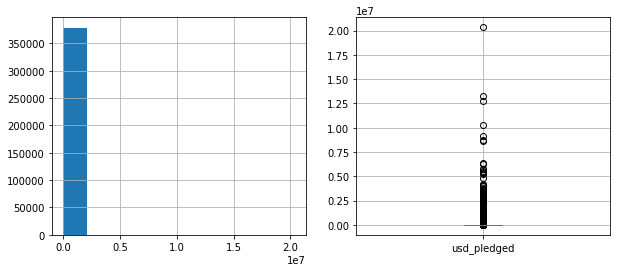

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,4))

plt.subplot(121)
kickstarter_2018.usd_pledged.hist();

plt.subplot(122)
kickstarter_2018.boxplot(column='usd_pledged');

**Nota:** "There are many rules of thumb for how to define an outlier but there is no silver bullet. One rule of thumb is that any data point that is three standard deviations away from the mean of the same data point for all observations."

In [102]:
# Descartamos los valores que están a 3 valores de la desviación estandar.
# (en este caso solo los valores + no tenemos valores - en esta base de datos)

outliers = kickstarter_2018[kickstarter_2018.usd_pledged > (kickstarter_2018.usd_pledged.mean() + 
                                                            3 * kickstarter_2018.usd_pledged.std())]
outliers

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000629643,ODIN: Android 'Smart' Projector to Carry in Yo...,Hardware,Technology,USD,2014-07-08,250000.00,2014-05-28 13:54:18,268192.00,successful,561,US,268192.00,268192.00,250000.00,0
1000725978,"Air Bonsai | Create your ""little star""",Product Design,Design,USD,2016-03-01,80000.00,2016-01-21 12:18:00,843743.00,successful,3784,US,843743.00,843743.00,80000.00,0
1001502333,Pimax: The World's First 8K VR Headset,Hardware,Technology,USD,2017-11-03,200000.00,2017-09-19 19:02:23,4236618.49,successful,5946,US,608194.00,4236618.49,200000.00,0
1003182869,RinseKit: The Revolutionary Portable Shower,Gadgets,Technology,USD,2016-06-03,30000.00,2016-05-04 19:27:57,396299.00,successful,2412,US,396299.00,396299.00,30000.00,0
1006008989,War for the Overworld,Video Games,Games,GBP,2013-01-03,150000.00,2012-11-29 19:11:23,211371.50,successful,8351,GB,338527.51,338589.87,240280.65,0
1008109037,The Electron: Cellular dev kit with a global d...,DIY Electronics,Technology,USD,2015-04-02,30000.00,2015-02-25 20:15:17,578478.33,successful,5564,US,578478.33,578478.33,30000.00,0
1008826259,"NORTH DRINKWARE : Mt. Hood, The Oregon Pint Glass",Product Design,Design,USD,2015-03-05,15000.00,2015-02-01 14:38:37,531581.00,successful,5620,US,531581.00,531581.00,15000.00,0
101767263,3Doodler: The World's First 3D Printing Pen,Hardware,Technology,USD,2013-03-25,30000.00,2013-02-19 06:08:59,2344134.67,successful,26457,US,2344134.67,2344134.67,30000.00,0
1019039281,The Apocrypha Adventure Card Game,Tabletop Games,Games,USD,2015-05-14,66666.00,2015-04-14 17:00:06,333661.99,successful,2477,US,333661.99,333661.99,66666.00,0


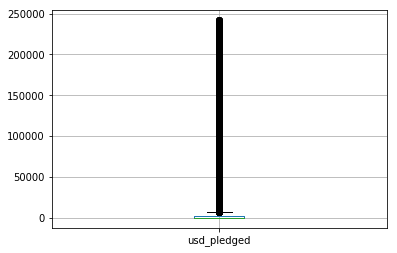

In [112]:
plt1= kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged')

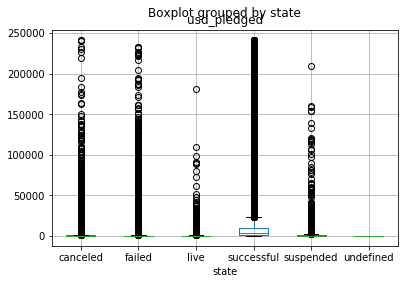

In [113]:
plt2= kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged',by='state')

* Analizamos outliers por categorías

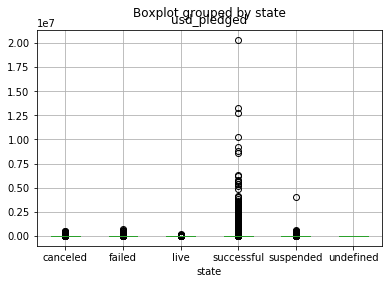

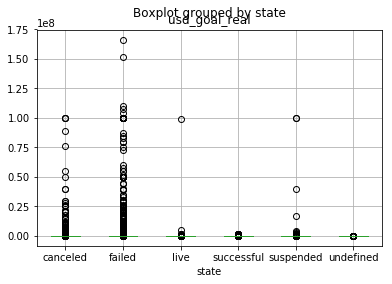

In [116]:
plt3= kickstarter_2018.boxplot(column='usd_pledged',by='state')

plt4= kickstarter_2018.boxplot(column='usd_goal_real',by='state')

#### Ejercicio 6

**1)** Calcular los valores atípicos de 'usd_goal_real'

In [126]:
# Obtenemos los valores atípicos (outliers) de 'usd_goal_real'(ugr)
outliers_ugr = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers_ugr

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.00,2014-06-21 22:34:21,285.00,failed,5,CA,263.41,264.67,3575408.62,0
1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.00,2015-07-07 21:14:52,0.00,failed,0,IT,0.00,0.00,5568982.99,0
1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.00,2016-02-27 13:08:01,15.00,failed,6,ES,16.59,17.10,17104542.97,-1
1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.00,2013-10-08 23:16:26,0.00,canceled,0,US,0.00,0.00,10000000.00,0
1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.00,2016-09-26 18:08:01,1.00,canceled,1,US,0.00,1.00,20000000.00,0
1031487313,Music app ( Pupilize) is the next big thing fo...,Music,Music,USD,2017-02-07,5000000.00,2017-01-08 06:49:52,0.00,failed,0,US,0.00,0.00,5000000.00,0
1046235166,Duel,Science Fiction,Film & Video,USD,2016-03-06,10000000.00,2016-01-06 15:00:11,100.00,failed,2,US,100.00,100.00,10000000.00,0
1052555922,Cloud Based Project Analytics Dashboards,Software,Technology,USD,2017-03-05,10000000.00,2017-03-04 01:25:03,25.00,failed,1,US,25.00,25.00,10000000.00,0
1062809925,Turn a Blind Eye,Narrative Film,Film & Video,GBP,2014-02-21,4000000.00,2013-12-23 22:36:10,0.00,failed,0,GB,0.00,0.00,6671447.87,0


**2)** Graficar los boxplots, con y sin estos valores (outliers) por categoría

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

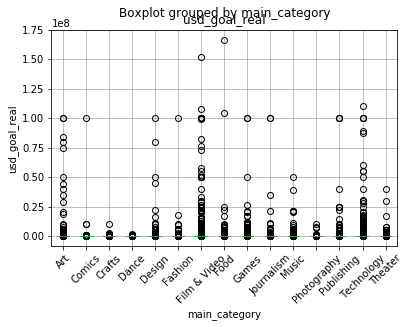

In [127]:
# Boxplot con Outliers

kickstarter_2018.boxplot(column='usd_goal_real', by='main_category');
plt.ylabel('usd_goal_real')
plt.xlabel('main_category')
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

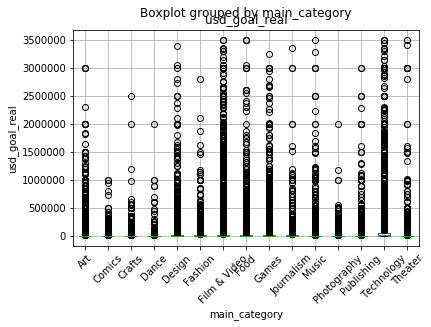

In [128]:
# Boxplot sin outliers 

# kickstarter_2018.boxplot(column='usd_goal_real', by='main_category');
kickstarter_2018.drop(outliers_ugr.index).boxplot(column='usd_goal_real', by='main_category');
plt.ylabel('usd_goal_real')
plt.xlabel('main_category')
plt.xticks(rotation=45)

## 2.7. Evaluar cómo comprimir los datos 
para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento.


## 2.8. Guardar el set de datos con un nombre informativo.


EL problema de la ingeniería de software

-----------------------------------------------------------------